In [2]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package punkt to /home/pedrox/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedrox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/pedrox/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [3]:
!pip install pandas
import pandas as pd
df = pd.read_csv('./data_cleaning.csv',sep=';')
#df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:4]
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

/home/pedrox/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='ncm'>

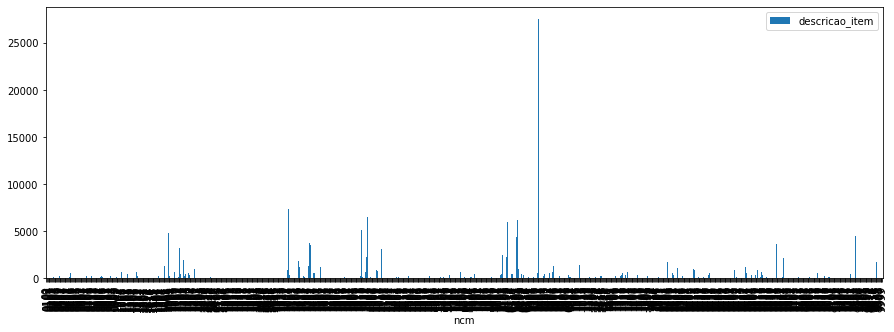

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plt
df_group = df.groupby('ncm').count()
df_group
df_group.plot.bar( figsize=(15, 5))

In [5]:
over5000 = []
median = []
less1000 = []

for i in range(len(df_group)):
    if df_group['descricao_item'].iloc[i] > 5000:
        over5000.append(df_group['descricao_item'].index[i])
    elif df_group['descricao_item'].iloc[i] < 1000:
        less1000.append(df_group['descricao_item'].index[i])
    else:
        median.append(df_group['descricao_item'].index[i])

In [6]:
print(f"acima de 5000 amostras {len(over5000)}\nentre 5000 e 1000 {len(median)}\nabaixo de 1000 {len(less1000)}")


acima de 5000 amostras 15
entre 5000 e 1000 63
abaixo de 1000 920


In [7]:
len(df)

343240

In [8]:
#DROP menores que 1000
for i in less1000:
   df.drop(df.loc[df['ncm'] == i].index, inplace=True)

In [9]:
len(df)

250477

In [10]:
import pandas as pd
import numpy as np


for i in over5000: 
    remove_n = len(df.loc[df['ncm'] == i ]) - 5000
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    index_to_drop = df.index[df['ncm'] == remove_class][:remove_n]
    #Finally drop those indexes
    df = df.drop(index_to_drop)

In [11]:
df = df.reset_index()
df

,index,descricao_item,ncm
0,16,OIL E7 15W GRANEL DEP,2710
1,41,GINKGO VITAL MG CPS SIM GINKGO BILOBA,3923
2,78,CONECTOR XLR LINHA P MACHO NIQ,8536
3,110,DES DOVE R ON GO FRESH RO,3307
4,116,#*DES.NIVEA R-ON FEM.DRY CONF.,3307
...,...,...,...
202894,343239,ZFC 1297308 ANEL SINCRONIZADO 3AAPILOTO,8708
202895,343240,ZFC 1297306120 PASTILHA DO GARFO CAMBIO ZF 16S,8708
202896,343242,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,8708
202897,343245,ZORDS COM FIGURA E,9503


In [12]:
df = df.drop(columns=['index'])

<AxesSubplot:xlabel='ncm'>

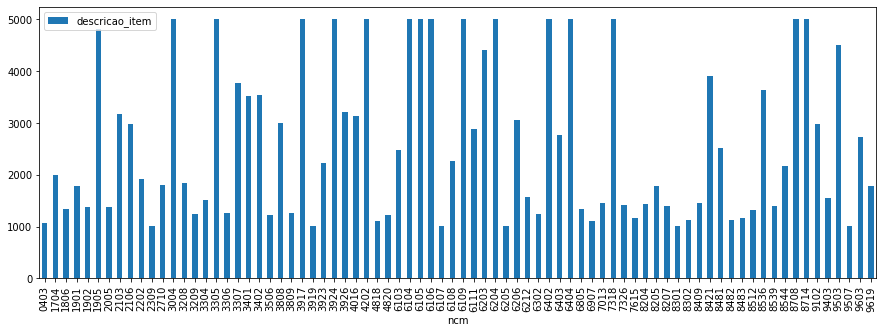

In [13]:
df_group_nw = df.groupby('ncm').count()
df_group_nw
df_group_nw.plot.bar( figsize=(15, 5))

In [14]:
palavras_final = []
for i in range(len(df['descricao_item'])): 
    produto = df['descricao_item'].iloc[i]
    from string import punctuation
    sentencas = nltk.sent_tokenize(produto)
    palavras = nltk.word_tokenize(produto.upper())
    stemmer = nltk.stem.RSLPStemmer()
    palavras_stem = []
    for palavra in palavras:
        palavras_stem.append(stemmer.stem(palavra))
    palavras_sem_stopwords = [palavras_stem for palavras_stem in palavras_stem if palavras_stem not in stopwords]
    palavra_final = ' '.join(palavras_sem_stopwords)
    palavras_final.append(palavra_final)
x = pd.Series(palavras_final)
df['descricao_item_clean'] = x

In [15]:
df.dropna()

,descricao_item,ncm,descricao_item_clean
0,OIL E7 15W GRANEL DEP,2710,oil e7 15w granel dep
1,GINKGO VITAL MG CPS SIM GINKGO BILOBA,3923,ginkg vital mg cp sim ginkg bilob
2,CONECTOR XLR LINHA P MACHO NIQ,8536,conec xlr linh p mach niq
3,DES DOVE R ON GO FRESH RO,3307,dov r on go fresh ro
4,#*DES.NIVEA R-ON FEM.DRY CONF.,3307,# * des.nive r-on fem.dry conf .
...,...,...,...
202894,ZFC 1297308 ANEL SINCRONIZADO 3AAPILOTO,8708,zfc 1297308 anel sincron 3aapilot
202895,ZFC 1297306120 PASTILHA DO GARFO CAMBIO ZF 16S,8708,zfc 1297306120 pastilh garf cambi zf 16
202896,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,8708,zin maquin vidr esquerd pin alt
202897,ZORDS COM FIGURA E,9503,zord figur


In [16]:
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item_clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels_enc = LabelEncoder()
y_train_labels_fit = labels_enc.fit(y_train)
y_train_lables_trf = labels_enc.transform(y_train)

#print(labels.classes_)

In [21]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train)

In [23]:
from sklearn import metrics
import numpy as np
y_test = y_test.astype(int)
p_count = count_vect.transform(list(X_test))
p_tfidf = tf_transformer.transform(p_count)
y_pred = clf.predict(p_tfidf)
y_pred = list(map(int, y_pred))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         403       0.95      0.95      0.95       196
        1704       0.89      0.92      0.90       388
        1806       0.84      0.89      0.87       283
        1901       0.86      0.93      0.89       365
        1902       0.89      0.93      0.91       267
        1905       0.92      0.96      0.94       998
        2005       0.93      0.96      0.94       276
        2103       0.90      0.92      0.91       636
        2106       0.86      0.81      0.83       595
        2202       0.87      0.70      0.78       396
        2309       0.91      0.90      0.90       220
        2710       0.85      0.89      0.87       390
        3004       0.83      0.80      0.82       944
        3208       0.86      0.64      0.73       360
        3209       0.82      0.60      0.69       233
        3304       0.83      0.74      0.78       283
        3305       0.79      0.57      0.66      1032
        3306       0.90    

In [20]:
y_pred



array([71, 39,  6, ..., 38, 34, 16])